In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the CSV file
df = pd.read_csv('fraud test.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Step 1: Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()

# Step 2: Handling missing values
# Checking for missing values
missing_values = df.isnull().sum()

# Step 3: Dropping unwanted columns
df_cleaned = df.drop(['Unnamed: 0'], axis=1)

# Step 4: Removing duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Step 5: Encoding categorical variables (using Label Encoding for simplicity)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    # Only encode columns that have less than 30 unique values to avoid creating too many features
    if df_cleaned[col].nunique() < 30:
        df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

# Display the cleaned data and missing values information
df_cleaned.head(), missing_values


(  trans_date_trans_time        cc_num                              merchant  \
 0      21/06/2020 12:14  2.291160e+15                 fraud_Kirlin and Sons   
 1      21/06/2020 12:14  3.573030e+15                  fraud_Sporer-Keebler   
 2      21/06/2020 12:14  3.598220e+15  fraud_Swaniawski, Nitzsche and Welch   
 3      21/06/2020 12:15  3.591920e+15                     fraud_Haley Group   
 4      21/06/2020 12:15  3.526830e+15                 fraud_Johnston-Casper   
 
    category    amt   first      last  gender                       street  \
 0        10   2.86    Jeff   Elliott       1            351 Darlene Green   
 1        10  29.84  Joanne  Williams       0             3638 Marsh Union   
 2         5  41.28  Ashley     Lopez       0         9333 Valentine Point   
 3         9  60.05   Brian  Williams       1  32941 Krystal Mill Apt. 552   
 4        13   3.19  Nathan    Massey       1     5783 Evan Roads Apt. 465   
 
          city  ...      lat      long  city_pop

In [5]:
# Updating numerical columns list after preprocessing
numerical_cols_updated = [col for col in numerical_cols if col in df_cleaned.columns]

# Performing Statistical Analysis on the updated numerical columns
statistical_analysis_updated = df_cleaned[numerical_cols_updated].describe()

# Displaying the updated statistical analysis results
statistical_analysis_updated


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


# Transaction Amount Distribution

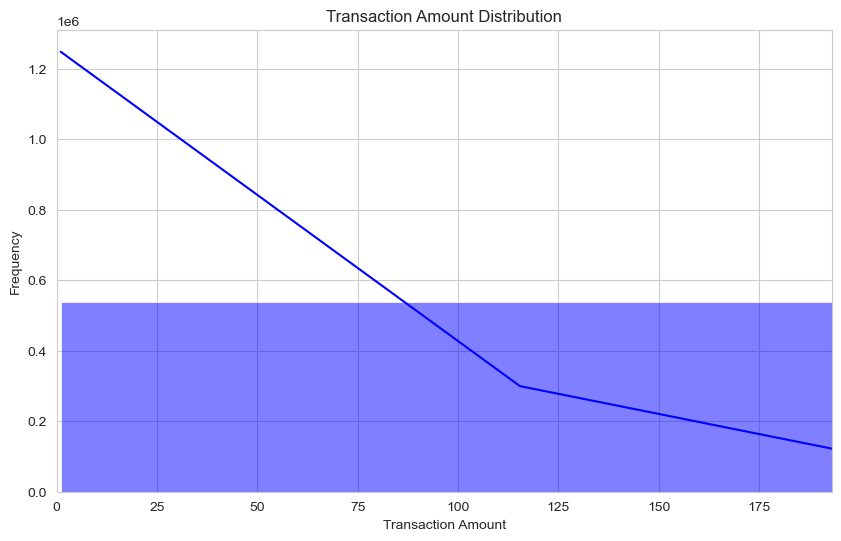

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['amt'], bins=100, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlim(0, df_cleaned['amt'].quantile(0.95))  # Focus on 95% of transactions for better visualization
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


# Fraud vs. Non-Fraud Transaction Counts

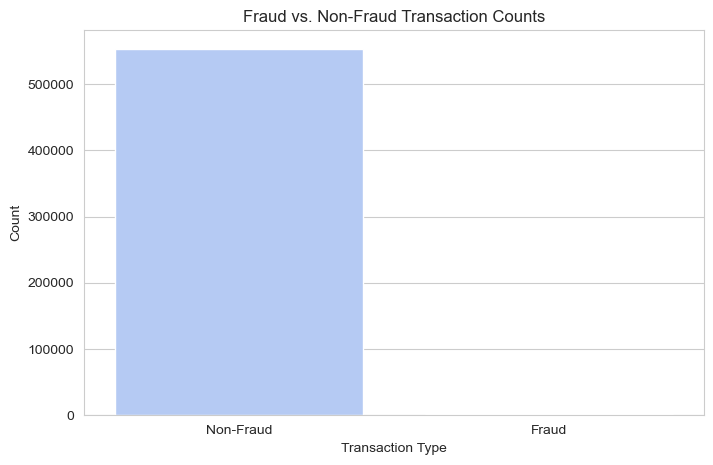

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_fraud', data=df_cleaned, palette='coolwarm')
plt.title('Fraud vs. Non-Fraud Transaction Counts')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


# City Population Distribution

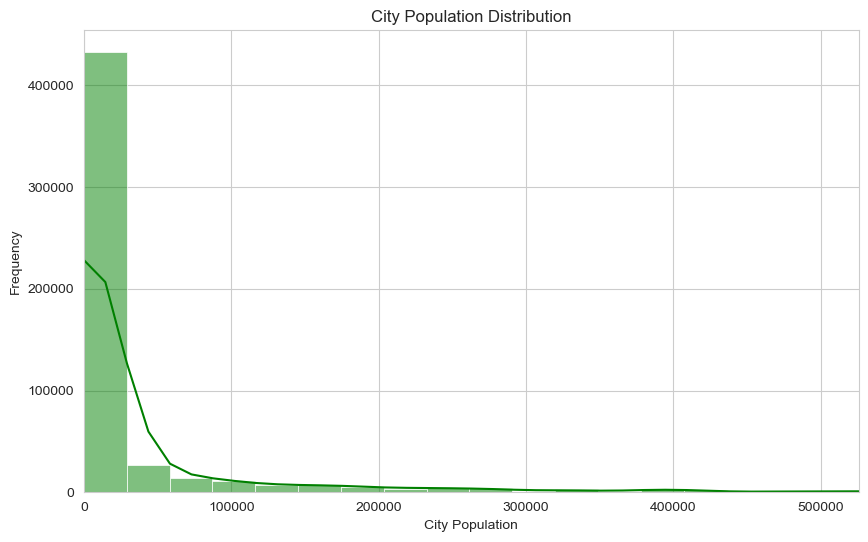

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['city_pop'], bins=100, kde=True, color='green')
plt.title('City Population Distribution')
plt.xlim(0, df_cleaned['city_pop'].quantile(0.95))  # Focus on 95% of data points for better visualization
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()


# Transaction Amount vs. Fraud Status

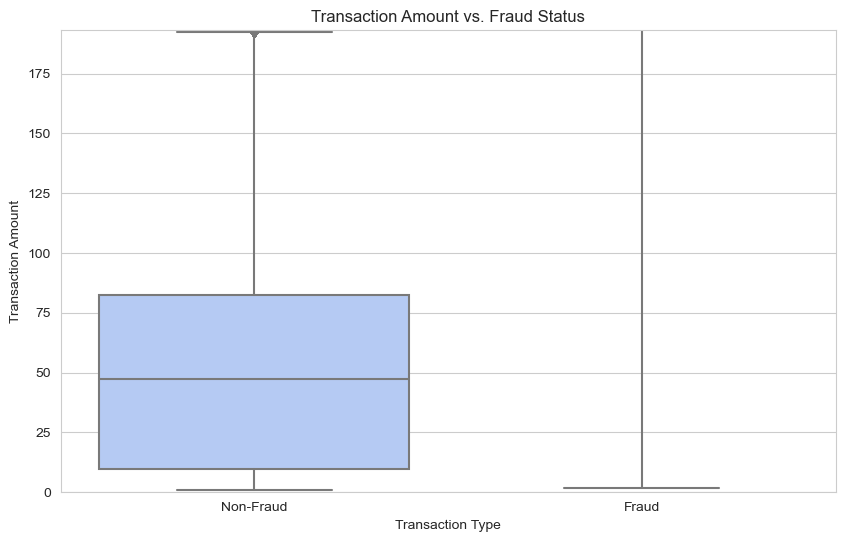

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df_cleaned, palette='coolwarm')
plt.title('Transaction Amount vs. Fraud Status')
plt.ylim(0, df_cleaned['amt'].quantile(0.95))  # Focus on 95% of transactions for clarity
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()


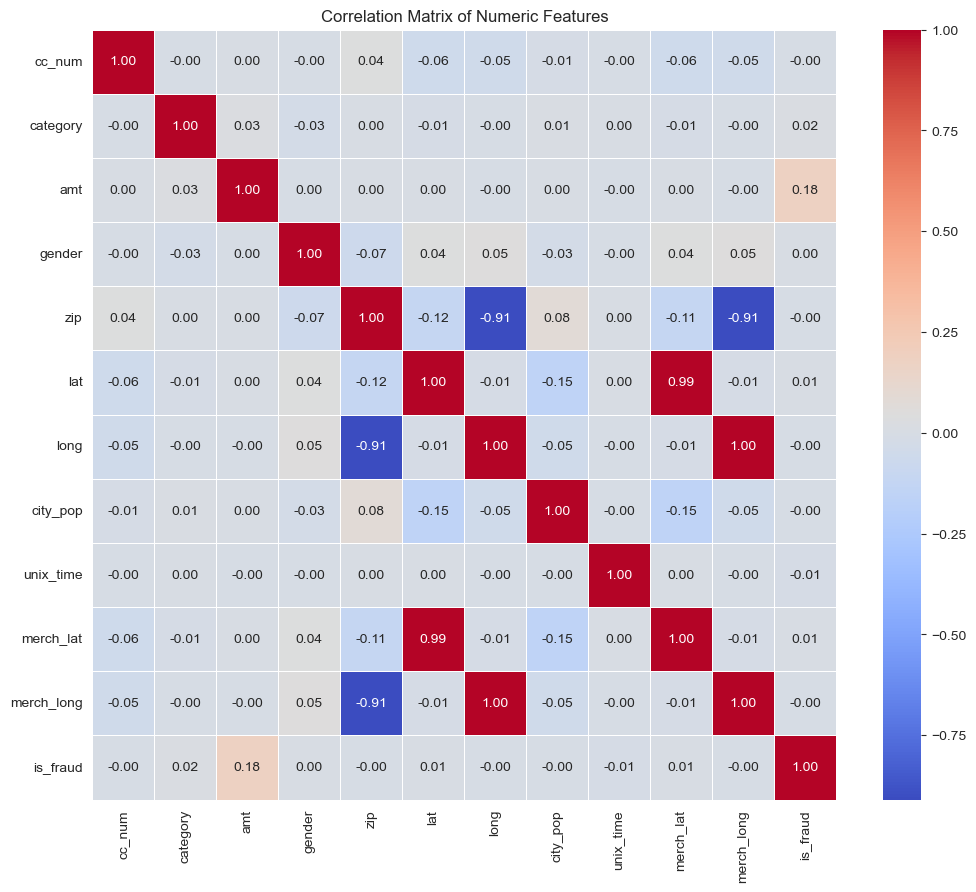

In [11]:
import numpy as np
# Select only numeric columns for correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()



# Performing Linear regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['is_fraud', 'amt'])  # Assuming 'amt' is your target
y = df_cleaned['amt']  # Assuming 'amt' is the continuous target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 26098.54737271991
R^2 Score: -2.2437180108303423e-05


# K-means clustering

Centroids (Original Scale): [[ 5.86454246e+17  6.25524506e+00  7.00486326e+01  3.83480254e-01
   8.13120770e+04  4.09953398e+01 -1.11179748e+02  9.22814446e+04
   1.38069319e+09  4.09995941e+01 -1.11186771e+02]
 [ 4.27831791e+17  6.29838039e+00  6.81396685e+01  3.92896660e-01
   5.48625568e+04  3.29884395e+01 -9.01911685e+01  1.18155327e+05
   1.38066034e+09  3.29613005e+01 -9.01925270e+01]
 [ 3.39920261e+17  6.18942409e+00  6.99310989e+01  5.18192747e-01
   3.11712086e+04  4.11220217e+01 -8.13855181e+01  6.70101221e+04
   1.38068486e+09  4.11369487e+01 -8.13817742e+01]]


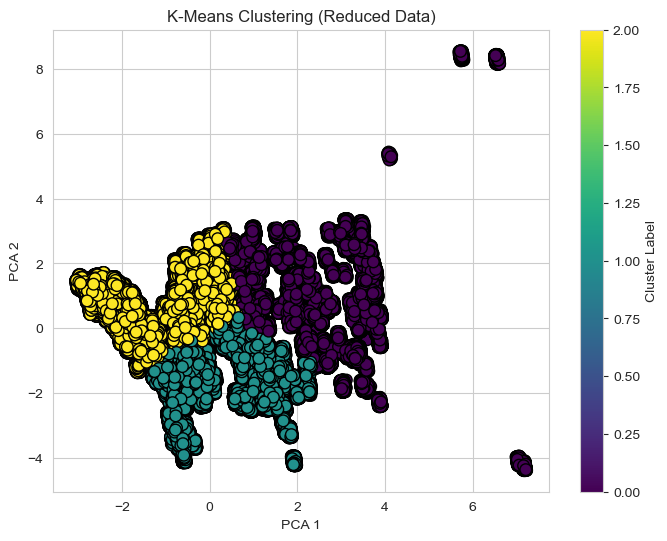

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your features dataset

# Step 1: Preprocessing Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Applying K-Means Clustering
# Explicitly setting n_init to 10, which is the current default
k = 3  # Example value, adjust based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# The cluster labels for each data point
labels = kmeans.labels_

# Step 3: Analyzing the Clusters
# Centroids in the original scale for interpretation
centroids_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroids (Original Scale):", centroids_original_scale)

# Step 4: Visualizing the Clusters
# Reduce data to two dimensions using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Plot the reduced data and color by cluster label
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=70)
plt.title('K-Means Clustering (Reduced Data)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()


# Logistic Regression:

In [18]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reinitialize and train the logistic regression model on scaled data
log_reg_scaled = LogisticRegression(max_iter=20000)
log_reg_scaled.fit(X_train_scaled, y_train)

# Predict probabilities on scaled test data
y_probs_scaled = log_reg_scaled.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve for scaled data
fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_probs_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

# Print AUC for scaled data
print(f"Scaled AUC: {roc_auc_scaled:.4f}")



Scaled AUC: 0.8537


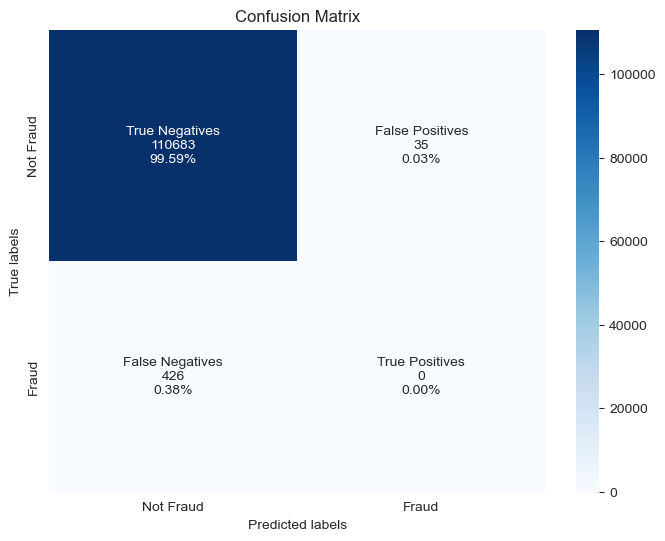

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred contains your model's predictions
y_pred = log_reg_scaled.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Assign labels to the matrix for clarity
cm_labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
cm_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
cm_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# Annotate each cell with the numeric value using seaborn
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(cm_labels, cm_counts, cm_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


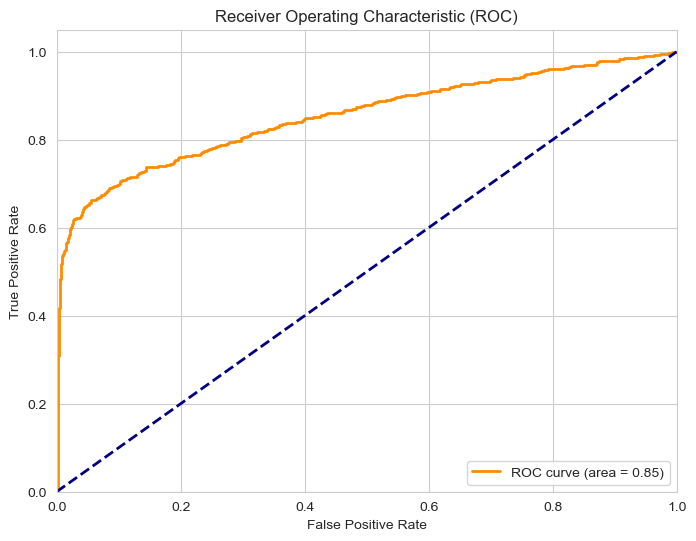

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data then applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Predict probabilities using the pipeline to ensure data is scaled
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Continue with ROC curve calculation and plotting as before
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined with your dataset's features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting the depth for easier visualization
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

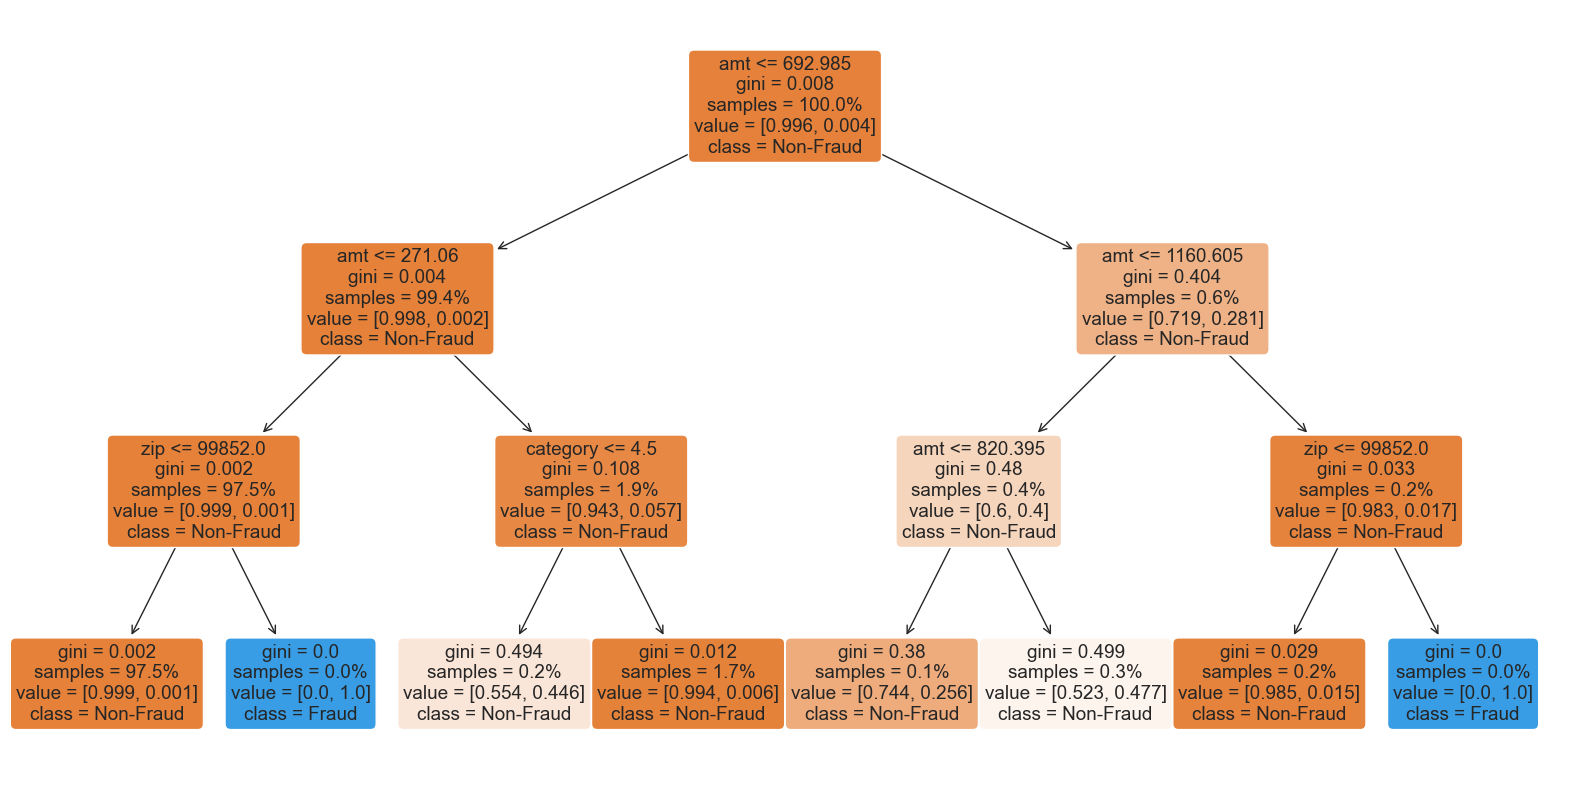

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'dt' is your trained Decision Tree model
# and 'X_train' is your training dataset

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(X_train.columns), class_names=['Non-Fraud', 'Fraud'], proportion=True, rounded=True)
plt.show()



# Random Forest for Feature Importance

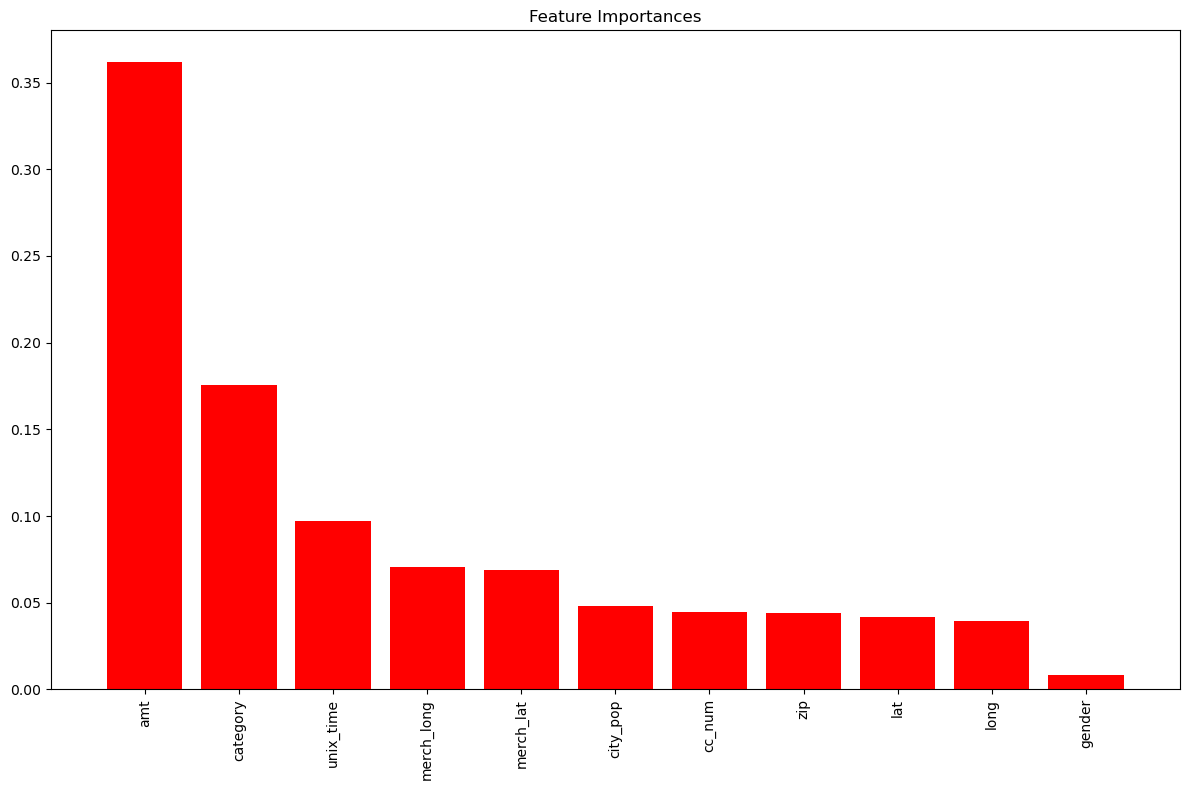

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_cleaned is your preprocessed DataFrame
# Ensure X includes only numeric features that are relevant for the model
X = df_cleaned.select_dtypes(include=[np.number]).drop(columns=['is_fraud'])
y = df_cleaned['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract and visualize feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

